In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [2]:
# total number of actions
df.shape

(8188, 4)

In [3]:
# number of unique users
df.nunique()

timestamp    8188
id           6328
group           2
action          2
dtype: int64

In [4]:
# size of control group and experiment group
df.group.value_counts()

control       4264
experiment    3924
Name: group, dtype: int64

In [5]:
#extracting all the actions from control group

control_df = df.query('group == "control"')

#print(control_df)

In [6]:
#to compute Click Through Rate divide the number of unique users who actually click courses button with total
#number of unique users who view the page.

control_ctr = control_df.query('action == "click"').id.nunique()/control_df.query('action == "view"').id.nunique()

print(control_ctr)

#thus the control CTR is about 28%

0.2797118847539016


In [7]:
#Do the same process for experiment group

#extracting all the actions from control group
experiment_df = df.query('group == "experiment"')

#computing CTR for experiment group
experiment_ctr = experiment_df.query('action == "click"').id.nunique()/experiment_df.query('action == "view"').id.nunique()

print(experiment_ctr)

#thus the experiment CTR is about 31%

0.3097463284379172


In [8]:
CTR_difference = experiment_ctr - control_ctr
print(CTR_difference)

#Here, the difference is about 3%

0.030034443684015644


In [33]:
#Validating the results using bootstrapping 
#To check that the difference is significant not just by chance
#Bootstrap the sample to simulate the sampling distribution for the difference in proportions

diffs = []

for _ in range(10000):
    boot_sample = df.sample(df.shape[0], replace = True)
    sample_df = boot_sample.query('group == "control"')
    experiment_df = boot_sample.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique()/control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique()/experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

(array([   6.,   71.,  416., 1295., 2513., 2828., 1855.,  798.,  185.,
          33.]),
 array([-0.00420697,  0.00233468,  0.00887633,  0.01541798,  0.02195963,
         0.02850128,  0.03504293,  0.04158458,  0.04812623,  0.05466788,
         0.06120952]),
 <a list of 10 Patch objects>)

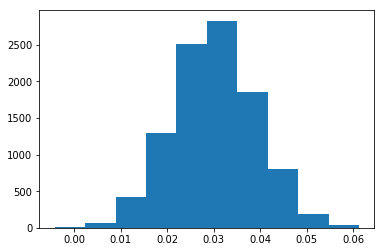

In [34]:
#Plotting means from bootstrap

plt.hist(diffs)

In [35]:
#to simulate from null we will create a normal distribution centered at 0 with the same std. deviation as
#samepling distribution

diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

(array([  27.,  238.,  925., 2150., 2881., 2346., 1084.,  300.,   44.,
           5.]),
 array([-0.0300624 , -0.0234712 , -0.01688   , -0.0102888 , -0.0036976 ,
         0.0028936 ,  0.00948479,  0.01607599,  0.02266719,  0.02925839,
         0.03584959]),
 <a list of 10 Patch objects>)

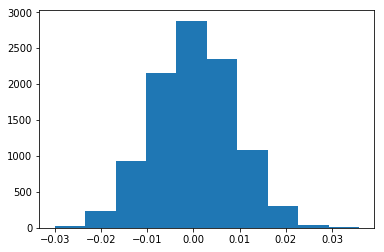

In [36]:
plt.hist(null_vals)

#below plot shows null distribution

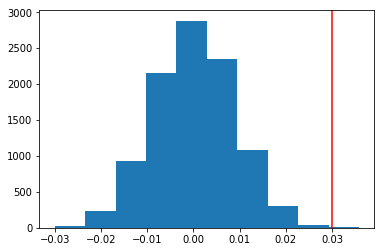

In [37]:
plt.hist(null_vals)

obs_diff = (diffs - null_vals).mean()
plt.axvline(x=obs_diff, color = 'red')

#red line shows where the observed statistics falls

In [39]:
#we can't find the p-value like this as there are below values more extreme than our statistics
#in favor of out alternative

(null_vals > obs_diff).mean()

#with p-value of nearly half a % the difference in CTR for control and alternative does appear to be significant

0.0004

In [40]:
#thus with this we can reject the null hypothesis and with this it looks like new homepage is performing better
#And audacity should lauch new homepage